In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud

In [2]:
#import the dataset
df = pd.read_csv('tweets_sport.csv')

In [3]:
df = df.replace(' ',np.nan)
df.dropna(subset=['likes'], inplace=True) ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13522 non-null  float64
 1   text              13522 non-null  object 
 2   event_number      13522 non-null  int64  
 3   player_dummy      13522 non-null  int64  
 4   team_dummy        13522 non-null  int64  
 5   weekday           13522 non-null  int64  
 6   month             13522 non-null  int64  
 7   day               13522 non-null  int64  
 8   time              13522 non-null  object 
 9   user_screen_name  13522 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
 13  Unnamed: 13       1 non-null      object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.5+ MB


In [4]:
df.isnull().sum()

id                      0
text                    0
event_number            0
player_dummy            0
team_dummy              0
weekday                 0
month                   0
day                     0
time                    0
user_screen_name        0
retweets                0
likes                   0
comments                0
Unnamed: 13         13521
dtype: int64

In [5]:
df.dropna(subset=['likes'], inplace=True)
df.drop(['Unnamed: 13'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13522 non-null  float64
 1   text              13522 non-null  object 
 2   event_number      13522 non-null  int64  
 3   player_dummy      13522 non-null  int64  
 4   team_dummy        13522 non-null  int64  
 5   weekday           13522 non-null  int64  
 6   month             13522 non-null  int64  
 7   day               13522 non-null  int64  
 8   time              13522 non-null  object 
 9   user_screen_name  13522 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.4+ MB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\j4072\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


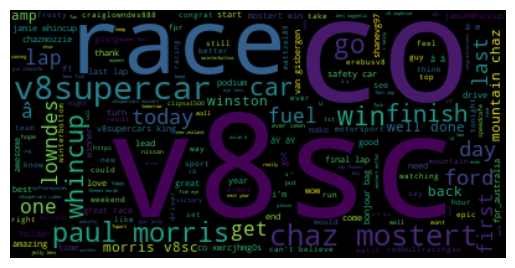

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Create stopword list:
stop_words = set(stopwords.words('english'))
stop_words.update(["rt", "bathurst","bathurst1000", "adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"])
textt = " ".join(review for review in df.text)


# Create word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [7]:
event_11 = df[df['event_number'] == 11]
event_11.dropna(inplace=True) # drop rows containing NaN values
len(event_11)

C:\Users\j4072\AppData\Local\Temp\ipykernel_4912\2413311232.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9619

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()


In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()


event_11[['neg', 'neu', 'pos', 'compound']] = event_11['text'].apply(lambda x: pd.Series(sentiment.polarity_scores(x)))
event_11.head(100)

C:\Users\j4072\AppData\Local\Temp\ipykernel_4912\334461600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\j4072\AppData\Local\Temp\ipykernel_4912\334461600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\j4072\AppData\Local\Temp\ipykernel_4912\334461600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,neg,neu,pos,compound
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.644,0.356,0.8881
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.862,0.138,0.4939
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0,0.0,0.833,0.167,0.5574
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0,0.0,0.893,0.107,0.2023
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0,0.0,0.871,0.129,0.1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.210000e+17,"""to put what happened to svg into perspective,...",11,0,0,7,10,12,7:09,4theloveofindy,0.0,0.0,0.0,0.0,1.000,0.000,0.0000
123,5.210000e+17,"""big day: charlotte, bathurst, fuji, motegi an...",11,0,0,7,10,12,18:09,4theloveofindy,0.0,1.0,0.0,0.0,1.000,0.000,0.0000
124,5.210000e+17,"""blanchard in the wall. safety car throws a mo...",11,0,0,7,10,12,7:03,4theloveofindy,0.0,0.0,0.0,0.0,0.865,0.135,0.4215
128,5.210000e+17,"""more real than most reality tv #bathurst1000""",11,0,0,7,10,12,7:09,50shadesofteal,0.0,0.0,0.0,0.0,1.000,0.000,0.0000


In [10]:
event_11 = event_11[event_11['compound'] != 0]

In [11]:
event_11['sentiment'] = event_11['compound'].apply(lambda rating : +1 if rating > 0 else -1)

In [12]:
print("negative samples:",len(event_11[event_11["sentiment"]==-1]))
print("postitive samples:",len(event_11[event_11["sentiment"]==1]))

negative samples: 1592
postitive samples: 4275


In [13]:
positive_11 = event_11[event_11['sentiment'] == 1]
negative_11 = event_11[event_11['sentiment'] == -1]

In [14]:
# df['event_number'].value_counts()

In [15]:
text=negative_11['text']

#Change the text to lower case
text = text.map(lambda text: text.lower())
#Convert data from pandas format to list values  
text=text.values.tolist()

#print the first 3 tweets
print(text[:3])

['"this is why i watch #v8sc no words..."', '"this #f1 has no last to 1st, roos on track, holes in the track, turn 2 crashes, fuel running out, etc. bit boring after #bathurst1000"', '"he is gunna run outta fuel!!\n its my biggest fear when driving my supercar each morning!\n#bathurst1000"']


In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\j4072\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\j4072\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# Conduct lemmatization for the words in the text
from nltk.stem import WordNetLemmatizer

tokens=[]
for sent in text:
    temp=[WordNetLemmatizer().lemmatize(word) for word in sent.split(" ")]
    tokens.append(temp)

In [19]:
# Customized the stopwords
from sklearn.feature_extraction import text 
# my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
# stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
#stop_words = text.ENGLISH_STOP_WORDS  #.union(my_additional_stop_words)
stop_words = list(stop_words)

Topic modelling for whole event 11

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

negative_11.dropna(inplace=True)  # drop rows containing NaN values
negative_11[['neg', 'neu', 'pos', 'compound']] = negative_11['text'].apply(lambda x: pd.Series(sentiment.polarity_scores(x)))
negative_11.head(100)

C:\Users\j4072\AppData\Local\Temp\ipykernel_4912\1862261783.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\j4072\AppData\Local\Temp\ipykernel_4912\1862261783.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,neg,neu,pos,compound,sentiment
7,5.210000e+17,"""this is why i watch #v8sc no words...""",11,0,0,7,10,12,7:19,038d017c,0.0,0.0,0.0,0.268,0.732,0.000,-0.2960,-1
13,5.210000e+17,"""this #f1 has no last to 1st, roos on track, h...",11,0,0,7,10,12,11:38,11shirt,1.0,0.0,1.0,0.170,0.830,0.000,-0.5423,-1
19,5.210000e+17,"""he is gunna run outta fuel!!\n its my biggest...",11,0,0,7,10,12,7:31,12bobleeswagger,0.0,0.0,0.0,0.203,0.797,0.000,-0.6219,-1
43,5.210000e+17,"""rt @redbullracingau: terrible bad luck for @t...",11,1,1,7,10,12,7:13,1sparkey,0.0,0.0,0.0,0.349,0.396,0.255,-0.3818,-1
58,5.210000e+17,"""no podium for you #bathurst1000""",11,0,0,7,10,12,7:34,2lapsdown,0.0,0.0,0.0,0.355,0.645,0.000,-0.2960,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,5.210000e+17,"""have the v8 supercars race controllers not he...",11,0,0,7,10,12,7:22,am_baker,0.0,0.0,0.0,0.139,0.861,0.000,-0.3446,-1
946,5.210000e+17,"""i'm going to cry unhappy tears #bathurst1000""",11,0,0,7,10,12,8:05,amandabourke80,0.0,1.0,0.0,0.661,0.339,0.000,-0.7783,-1
952,5.210000e+17,"""geez what a crazy race #bathurst1000""",11,0,0,7,10,12,7:06,amandar327,0.0,1.0,1.0,0.375,0.625,0.000,-0.3400,-1
954,5.210000e+17,"""rt @wadey_80: this is the craziest race i hav...",11,0,0,7,10,12,7:31,amandar327,0.0,0.0,0.0,0.107,0.893,0.000,-0.0516,-1


In [24]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Set how many topics we need
NUM_TOPICS = 10
negative_11['tokens']=tokens
text_train = list(negative_11['tokens'].apply(lambda x: ' '.join(x)))

# Convert a collection of text documents to a matrix of token counts.
## min_df: ignore terms that have a document frequency strictly lower than the given threshold
## max_df: ignore terms that have a document frequency strictly higher than the given threshold
## stop_words: ‘english’, list
## lowercase: Convert all characters to lowercase before tokenizing.
## token_pattern: Regular expression denoting what constitutes a “token”
vectoriser = CountVectorizer(min_df=5, max_df=0.9,
                             stop_words=stop_words,lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')

data_vectorized= vectoriser.fit_transform(text_train)

# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, random_state=0, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
 
#text = "mclaughlin: we can win front row qualifying only the start for volvo says young gun"
#x = lda_model.transform(vectorizer.transform([text]))[0]
#print(x, x.sum())

<timed exec>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CPU times: total: 1.36 s
Wall time: 2 s


In [25]:
print(lda_Z.shape)

(1592, 10)


Show the top 10 most frequent words in each topic


In [26]:
def print_topics(model, vectoriser, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        feature_names = vectoriser.get_feature_names_out()
        print([(feature_names[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print("LDA Model:")
print_topics(lda_model, vectoriser)
print("=" * 20)

LDA Model:
Topic 1:
[('bad', 46.10683377720546), ('shanevg', 42.443158546698264), ('luck', 36.61797351415651), ('redbullracingau', 33.11169106054975), ('shame', 30.250483561504986), ('year', 26.453833733056676), ('teknoautosports', 26.333676998486187), ('bastard', 25.727612538179876), ('way', 25.506624178198077), ('terrible', 24.802613841847784)]
Topic 2:
[('van', 58.156815724910395), ('gisbergen', 53.57390767854927), ('finish', 40.958024607213986), ('day', 39.430698763251236), ('shane', 35.82507735697097), ('race', 34.08090487109309), ('heartbreaking', 34.01522234870479), ('redbullracingau', 31.648907628015927), ('come', 30.313068049635106), ('jamie', 26.118782678678663)]
Topic 3:
[('race', 91.61153792707817), ('today', 35.069519576263005), ('crazy', 34.756530589469286), ('absolutely', 21.608350289385683), ('channel', 20.384693265211613), ('man', 20.221241852748005), ('gutted', 19.251410400432942), ('turn', 18.080060791140628), ('first', 16.090655021106635), ('thought', 15.96303042054

In [27]:
x = lda_model.transform(data_vectorized)
print(x[3])

[0.91818147 0.00909114 0.00909096 0.00909091 0.00909098 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091]


In [30]:
import pandas as pd
import numpy as np

topics=pd.DataFrame(x)
topics.columns=['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10']

topics['tweet']=negative_11['text']
topics['month']=negative_11['month']
topics['day']=negative_11['day']
topics['event_number']=negative_11['event_number']
pd.DataFrame(topics).to_csv('tweets_by_topics_all_new.csv',index=False)

In [31]:
topics

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,tweet,month,day,event_number
0,0.033333,0.699991,0.033333,0.033333,0.033342,0.033333,0.033333,0.033333,0.033333,0.033333,NaN,NaN,NaN,NaN
1,0.010000,0.010000,0.010002,0.909993,0.010000,0.010004,0.010000,0.010000,0.010000,0.010000,NaN,NaN,NaN,NaN
2,0.016667,0.016667,0.016667,0.308644,0.390105,0.184582,0.016667,0.016669,0.016667,0.016667,NaN,NaN,NaN,NaN
3,0.918181,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,NaN,NaN,NaN,NaN
4,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,"""what a day! dramas at #bathurst1000 &amp; now...",10.0,12.0,11.0
1588,0.014289,0.158201,0.157143,0.014286,0.014286,0.014286,0.014286,0.157142,0.441796,0.014286,NaN,NaN,NaN,NaN
1589,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,NaN,NaN,NaN,NaN
1590,0.025000,0.025005,0.025000,0.274993,0.025000,0.275001,0.025000,0.274999,0.025000,0.025003,NaN,NaN,NaN,NaN


In [32]:
import pyLDAvis.lda_model
 
pyLDAvis.enable_notebook()

# The parameters wee need,
## LDA model: lda_model
## vectorized model: data_vectorized
## matrix of token counts: vectoriser

panel = pyLDAvis.lda_model.prepare(lda_model, data_vectorized, vectoriser, sort_topics = False)
panel

C:\Users\j4072\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.191417 -0.125924       1        1   7.679129
1      0.230748 -0.040624       2        1  10.161207
2      0.139726 -0.107638       3        1   7.630309
3      0.002426  0.207739       4        1   9.552497
4      0.044353  0.161775       5        1  13.058714
5     -0.108436  0.103159       6        1  13.703947
6     -0.216638 -0.172047       7        1   9.792456
7     -0.143598  0.189764       8        1   9.736286
8      0.088482 -0.023332       9        1   8.588736
9     -0.228479 -0.192873      10        1  10.096719, topic_info=          Term        Freq       Total Category  logprob  loglift
314       race  182.000000  182.000000  Default  30.0000  30.0000
437    whincup  147.000000  147.000000  Default  29.0000  29.0000
239    lowndes  122.000000  122.000000  Default  28.0000  28.0000
149       fuck   66.000000   66.000000  Default  27.0000  27.0000
422        van   83.000000   83.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
239    lowndes   63.079044  122.105562  Topic10  -2.5528   1.6325
460        yet    7.819103   12.905412  Topic10  -4.6407   1.7919
99       drive   12.968797   40.306007  Topic10  -4.1347   1.1590
383  supercars   23.443607  166.485942  Topic10  -3.5426   0.3326
193       holy   10.034746   34.020214  Topic10  -4.3912   1.0721

[441 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.921232    absolute
1         3  0.961548  absolutely
2         8  0.903313     accused
3         2  0.926052      across
4        10  0.961408       alone
...     ...       ...         ...
458       6  0.938695         yep
459       9  0.891642         yes
460       6  0.309947         yet
460      10  0.619895         yet
461       9  0.844804       zlkyx

[503 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])